In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils
import nanonets

In [289]:
def average_outputs(folder, N_stat, N_threads):

    values          = [pd.read_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means           = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns)
    means['Error']  = np.std(values,axis=0)[:,-2]/np.sqrt(len(values))

    means.to_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

def average_states(folder, N_stat, N_threads):

    values  = [pd.read_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means   = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns).round(3)
    
    means.to_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

freq = "f3/"

# Combine output currents
average_outputs(f"1I_1O_R_corr/data/{freq}R_50/", 10, 10)
average_outputs(f"1I_1O_R_corr/data/{freq}R_100/", 10, 10)
average_outputs(f"1I_1O_R_corr/data/{freq}R_200/", 10, 10)
# average_outputs(f"1I_1O_R_corr/data/{freq}R_400/", 10, 10)

# Combine states
average_states(f"1I_1O_R_corr/data/{freq}R_50/", 10 , 10)
average_states(f"1I_1O_R_corr/data/{freq}R_100/", 10 , 10)
average_states(f"1I_1O_R_corr/data/{freq}R_200/", 10 , 10)
# average_states(f"1I_1O_R_corr/data/{freq}R_400/", 10 , 10)

In [290]:
freq                = "f3/"
results             = pd.DataFrame()
results["t"]        = np.loadtxt("1I_1O_R_corr/time.csv")[1:]*10**9
results['U']        = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_50/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']
results["R_50_I"]   = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_50/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_50_uI"]  = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_50/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["R_100_I"]  = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_100/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_100_uI"] = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_100/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["R_200_I"]  = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_200/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_200_uI"] = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_200/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
# results["R_400_I"]  = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_400/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
# results["R_400_uI"] = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_400/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results = results.iloc[1000:,:].reset_index(drop=True)
results

,t,U,R_50_I,R_50_uI,R_100_I,R_100_uI,R_200_I,R_200_uI
0,100.1,0.116653,2500.0,455.521679,2300.0,420.832508,2800.0,448.998886
1,100.2,0.115190,2500.0,497.493719,2000.0,424.264069,2600.0,460.868745
2,100.3,0.113782,1800.0,384.187454,2400.0,449.888875,2400.0,492.341345
3,100.4,0.112433,2300.0,420.832508,2100.0,407.308237,2600.0,438.634244
4,100.5,0.111144,2900.0,453.762052,2000.0,447.213595,1900.0,417.013189
...,...,...,...,...,...,...,...,...
994,199.5,0.132826,1700.0,375.632799,2000.0,424.264069,2100.0,407.308237
995,199.6,0.134718,2300.0,465.939910,2500.0,433.012702,2400.0,427.083130
996,199.7,0.136634,2200.0,414.246304,2200.0,414.246304,1800.0,384.187454
997,199.8,0.138571,2500.0,433.012702,1700.0,375.632799,2400.0,471.593045


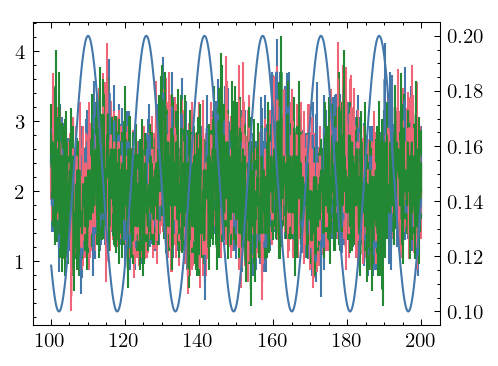

In [291]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    ax  = fig.add_subplot()
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'])
    ax.errorbar(results['t'], results['R_50_I']/1000, results['R_50_uI']/1000)
    ax.errorbar(results['t'], results['R_100_I']/1000, results['R_100_uI']/1000)
    ax.errorbar(results['t'], results['R_200_I']/1000, results['R_200_uI']/1000)
    # ax.errorbar(results['t'], results['R_400_I'], results['R_400_uI'])

In [ ]:
# data = {}

# results         = pd.DataFrame()
# results["t"]    = np.loadtxt("1I_1O/time.csv")[1:]*10**9
# results['U']    = pd.read_csv("1I_1O/data/f1/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']
# results["I"]    = pd.read_csv("1I_1O/data/f1/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
# results["uI"]   = pd.read_csv("1I_1O/data/f1/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
# data[5e7]       = results

# results         = pd.DataFrame()
# results["t"]    = np.loadtxt("1I_1O/time.csv")[1:]*10**9
# results['U']    = pd.read_csv("1I_1O/data/f2/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']
# results["I"]    = pd.read_csv("1I_1O/data/f2/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
# results["uI"]   = pd.read_csv("1I_1O/data/f2/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
# data[10e7]      = results

# results         = pd.DataFrame()
# results["t"]    = np.loadtxt("1I_1O/time.csv")[1:]*10**9
# results['U']    = pd.read_csv("1I_1O/data/f3/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']
# results["I"]    = pd.read_csv("1I_1O/data/f3/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
# results["uI"]   = pd.read_csv("1I_1O/data/f3/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
# data[20e7]      = results

In [ ]:
# with plt.style.context(["science","bright"]):

#     fig = plt.figure(dpi=150)
#     fig.set_figheight(fig.get_figheight())
    
#     ax  = fig.add_subplot(3,1,1)
#     ax.errorbar(data[5e7]['t'], data[5e7]['I']/1000, data[5e7]['uI']/1000)
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_ylim(-6,6)
#     ax.set_xticklabels("")

#     ax2 = ax.twinx()
#     ax2.plot(data[5e7]['t'], data[5e7]['U'], c='#A60628', label=f"$f = {5e7 / 10**9}$ nHz")
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax2.legend(fontsize='x-small', loc='upper right', frameon=True)

#     ax  = fig.add_subplot(3,1,2)
#     ax.errorbar(data[10e7]['t'], data[10e7]['I']/1000, data[10e7]['uI']/1000)
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_ylim(-6,6)
#     ax.set_xticklabels("")

#     ax2 = ax.twinx()
#     ax2.plot(data[10e7]['t'], data[10e7]['U'], c='#A60628', label=f"$f = {10e7 / 10**9}$ nHz")
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax2.legend(fontsize='x-small', loc='upper right', frameon=True)

#     ax  = fig.add_subplot(3,1,3)
#     ax.errorbar(data[20e7]['t'], data[20e7]['I']/1000, data[20e7]['uI']/1000)
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_ylim(-6,6)
#     ax.set_xlabel("$t$ [ns]")

#     ax2 = ax.twinx()
#     ax2.plot(data[20e7]['t'], data[20e7]['U'], c='#A60628', label=f"$f = {20e7 / 10**9}$ nHz")
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax2.legend(fontsize='x-small', loc='upper right', frameon=True)


In [ ]:
# with plt.style.context(["science","bright"]):

#     fig = plt.figure(dpi=150)
#     fig.set_figheight(fig.get_figheight())
    
#     ax  = fig.add_subplot(3,1,1)
#     ax2 = ax.twinx()
#     ax2.plot(results['t'], results['U'], c='#A60628')
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

#     ax.errorbar(results['t'], results['I']/1000, results['uI']/1000, label='uniform')
#     ax.set_xticklabels("")
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.legend()

#     ax  = fig.add_subplot(3,1,2)
#     ax2 = ax.twinx()
#     ax2.plot(results['t'], results['U'], c='#A60628')
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax.errorbar(results['t'], results['r_I']/1000, results['r_uI']/1000, label='r-Island')
#     ax.set_xticklabels("")
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.legend()

#     ax  = fig.add_subplot(3,1,3)
#     ax2 = ax.twinx()
#     ax2.plot(results['t'], results['U'], c='#A60628')
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax.errorbar(results['t'], results['R_I']/1000, results['R_uI']/1000, label='R-Island')
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_xlabel("$t$ [ns]")
#     ax.legend()

#     fig.savefig('plots/i_o_comp.svg', bbox_inches='tight', transparent=True)
#     fig.savefig('plots/i_o_comp.pdf', bbox_inches='tight', transparent=False)

In [ ]:
# x   = results["t"].values
# y   = results["U"].values

# def update(num, x, y, line):
#     line.set_data(x[:num], y[:num])
#     # line.axes.axis([xmin,xmax,ymin,ymax])
    
#     return line,

# with plt.style.context(["science","bright"]):

#     fig     = plt.figure(dpi=150)
#     ax      = fig.add_subplot()
#     # ax.set_xlabel("$t$ [ns]")
#     # ax.set_ylabel("$U_0$ [mV]")
    
#     line,   = ax.plot(x, y, lw=3)
#     ani     = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line], interval=50, repeat_delay=500)

# ani.save("plots/input.gif")

In [292]:
dic = {
    "R_50"    : pd.read_csv(f"1I_1O_R_corr/data/{freq}R_50/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_100"   : pd.read_csv(f"1I_1O_R_corr/data/{freq}R_100/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_200"   : pd.read_csv(f"1I_1O_R_corr/data/{freq}R_200/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    # "R_400"   : pd.read_csv(f"1I_1O_R_corr/data/{freq}R_400/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv")
}

for key, df in dic.items():
    dic[key] = df.iloc[1000:,:].reset_index(drop=True)

In [293]:
def scale_landscape(arr):
    return np.round((arr - np.min(arr,axis=0))/(np.max(arr,axis=0)-np.min(arr,axis=0)),2)

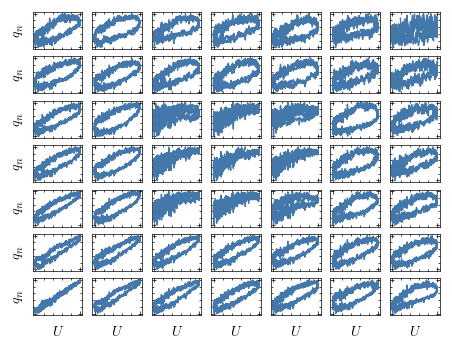

In [282]:
key = "R_200"

with plt.style.context(["science","bright"]):

    fig, axs = plt.subplots(ncols=7, nrows=7)

    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1.5)

    i = 0

    for row in np.arange(6,-1,-1):
        for col in range(0,7):

            axs[row,col].plot(results["U"]*1000, scale_landscape(dic[key][f"{i}"]).values)

            if i >= 7:
                axs[row,col].set_xticklabels("")
            else:
                axs[row,col].set_xticklabels("")
                axs[row,col].set_xlabel("$U$")

            if i % 7 != 0:
                axs[row,col].set_yticklabels("")
            else:
                axs[row,col].set_yticklabels("")
                axs[row,col].set_ylabel("$q_n$")

            i += 1

    # fig.savefig('plots/state_vs_time.svg', bbox_inches='tight', transparent=True)
    # fig.savefig('plots/state_vs_time.pdf', bbox_inches='tight', transparent=False)

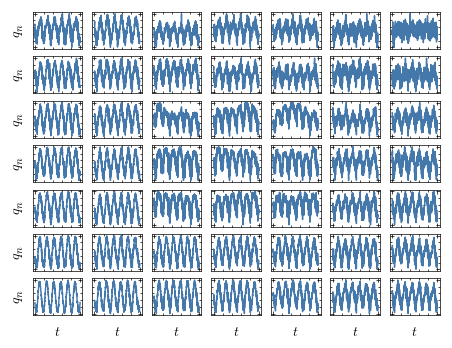

In [294]:
key = "R_200"

with plt.style.context(["science","bright"]):

    fig, axs = plt.subplots(ncols=7, nrows=7)

    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1.5)

    i = 0

    for row in np.arange(6,-1,-1):
        for col in range(0,7):

            axs[row,col].plot(results["t"], scale_landscape(dic[key][f"{i}"]).values)

            if i >= 7:
                axs[row,col].set_xticklabels("")
            else:
                axs[row,col].set_xticklabels("")
                axs[row,col].set_xlabel("$t$")

            if i % 7 != 0:
                axs[row,col].set_yticklabels("")
            else:
                axs[row,col].set_yticklabels("")
                axs[row,col].set_ylabel("$q_n$")

            i += 1

    # fig.savefig('plots/state_vs_time.svg', bbox_inches='tight', transparent=True)
    # fig.savefig('plots/state_vs_time.pdf', bbox_inches='tight', transparent=False)

In [260]:
from scipy.fft import fft, rfft, fftfreq, rfftfreq

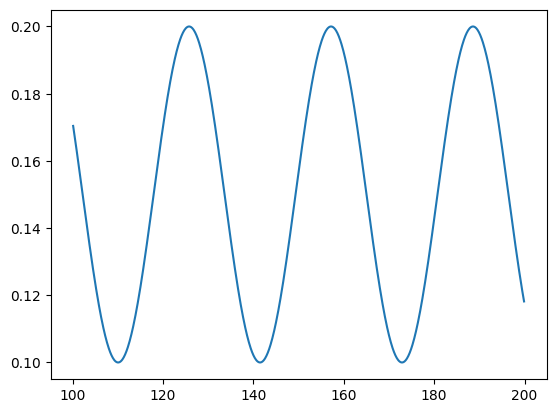

In [285]:
plt.plot(results["t"], results["U"])

In [284]:
def return_fft(arr : np.array, step_size : float):

    arr_norm    = (arr-np.min(arr))/(np.max(arr)-np.min(arr))
    sample_rate = 1/step_size

    xf      = rfftfreq(len(arr), 1. / sample_rate)
    yf      = np.abs(rfft(arr_norm))

    # xf          = np.fft.rfftfreq(len(arr), d=1./sample_rate)
    # yf          = 2*np.abs(np.fft.rfft(arr))/len(arr)

    return xf, yf

In [265]:
arr1 = results["U"].values
arr2 = dic["R_200"].values[:,24]
arr3 = results["R_200_I"].values

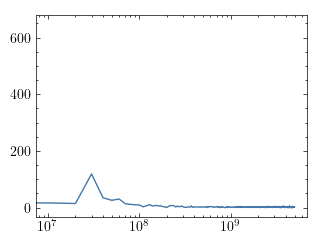

In [288]:
arr     = dic["R_200"].values[:,24]
xf, yf  = return_fft(arr, 1e-10)

with plt.style.context(["science","bright"]):
    
    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.plot(xf, yf)
    ax.set_xscale("log")

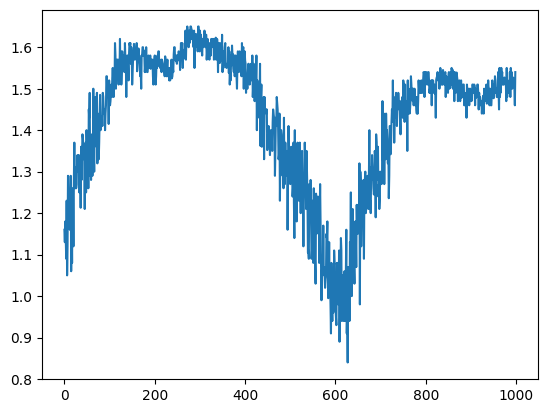

In [266]:
plt.plot(arr2)

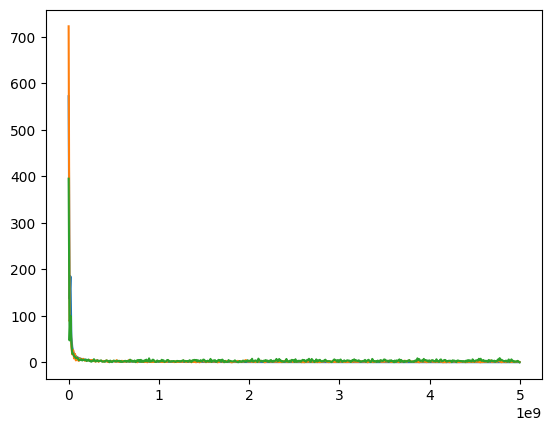

In [268]:
step_size   = 1e-10
x, y        = return_fft(arr1, step_size)
plt.plot(x, y)
x, y        = return_fft(arr2, step_size)
plt.plot(x, y)
x, y        = return_fft(arr3, step_size)
plt.plot(x, y)
plt.xlim(0,1e8)

In [41]:
def nonlinear_index(df : pd.DataFrame, main_frequency : float, sample_rate : float, time_scale=10**6, number_of_frequencies=10):

    N_values    = len(df)
    values      = []

    for col in df.columns:

        # Fourier Spectrum
        arr     = df.loc[:,col].values
        xf      = rfftfreq(N_values-1, 1 / sample_rate)/time_scale
        yf      = 2*np.abs(rfft(arr))/N_values
        df_f    = pd.DataFrame([xf, yf]).T
        df_f    = df_f[df_f[0] >= main_frequency/time_scale]
        df_f    = df_f.loc[df_f.loc[:,1].nlargest(number_of_frequencies).index].reset_index(drop=True)

        a       = df_f.iloc[1:,1].sum()
        b       = df_f.iloc[0,1]

        n_idx   = a/b
        values.append(n_idx)

    return values

In [ ]:
# Example: Cubic Network
network_topology = "cubic"

# Network Parameter
topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[6,6,0]]
}

# Network Class Object
np_network_cubic = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

In [ ]:
node_size = 150

fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
fig.savefig('plots/network_plot.svg', bbox_inches='tight', transparent=True)
fig.savefig('plots/network_plot.pdf', bbox_inches='tight', transparent=False)

node_size = np.repeat(150, 51)

for i in [16,17,18,23,24,25,30,31,32]:
    node_size[i] = 300

fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
fig.savefig('plots/network_plot_radius.svg', bbox_inches='tight', transparent=True)
fig.savefig('plots/network_plot_radius.pdf', bbox_inches='tight', transparent=False)